# Handling mixed variables in columns

Sometimes real time data may contain both numerical and categorical data. Sometimes these columns contains alphanumeric characters.

We basically split them into 2 columns:
1. With the alphabets
2. With the numerics

Sometimes, the column can contain distinct numeric and alphabets.
We create 2 columns in that case:
1. with only the numerics, and alphabet column gets NA
2. alphabets only in alphabet column, numerical column gets NA



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('/Users/arnabmaji/Documents/Documents/CSV Raw Data')
os.getcwd()

'/Users/arnabmaji/Documents/Documents/CSV Raw Data'

In [3]:
df = pd.read_csv('titanic.csv').reset_index(drop = True)

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S


In [5]:
# Converting the Ticket column to numeric column and bypassing all the errors as NaN value
df['Ticket_numeric'] = pd.to_numeric(df['Ticket'],errors = 'coerce',downcast='signed')

In [6]:
# Wherever the Ticket_numeric column came out null i.e. string values, we are replacing them with the value of the old column else NaN
df['Ticket_categorical'] = np.where(df['Ticket_numeric'].isnull(),df['Ticket'],np.NaN)

In [7]:
# Creating a new column with the numerical part of the columns using str.extract and regular expressions
df['Cabin_numeric'] = df['Cabin'].str.extract('(\d+)')
df['Cabin_categorical'] = df['Cabin'].str[0]

<AxesSubplot:>

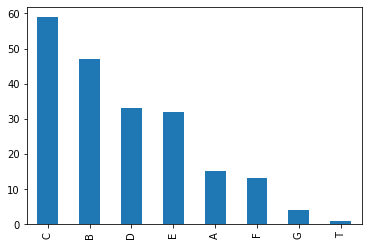

In [8]:
df['Cabin_categorical'].value_counts().plot(kind = 'bar')

In [9]:
# Splitting the column based on empty space
df['Ticket_numeric'] = df['Ticket'].apply(lambda s: s.split(' ')[-1])
# Converting column to numeric
df['Ticket_numeric'] = pd.to_numeric(df['Ticket_numeric'], errors = 'coerce', downcast = 'integer')

In [10]:
# Splitting the column based on empty space
df['Ticket_categorical'] = df['Ticket'].apply(lambda s: s.split(' ')[0])
# Wherever the data is numeric, replacing that with NaN
df['Ticket_categorical'] = np.where(df['Ticket_categorical'].str.isdigit(),np.NaN,df['Ticket_categorical'])

# Handling Date and Time variables in columns

In [11]:
df_date = pd.read_csv('DateFunctions.csv')

In [12]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [13]:
df_date['date'] = pd.to_datetime(df_date['date'])

In [14]:
df_date

,date,product_id,city_id,orders
0,2019-10-12,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-06-01,4344,25,3
...,...,...,...,...
995,2018-08-10,255,13,1
996,2018-06-12,5521,7,1
997,2019-07-05,487,26,14
998,2019-03-03,1503,21,2


In [15]:
# Getting year column
df_date['year'] = df_date['date'].dt.year 

In [16]:
# Getting month column
df_date['month'] = df_date['date'].dt.month 

In [17]:
# Getting month_name column
df_date['month_name'] = df_date['date'].dt.month_name()

In [18]:
# Getting month column
df_date['day'] = df_date['date'].dt.day 

In [19]:
# Getting day_of_week column
df_date['day_of_week'] = df_date['date'].dt.dayofweek 

In [20]:
# Getting day_of_week_name column
df_date['day_of_week_name'] = df_date['date'].dt.day_name()

In [21]:
# Getting week of the year column
df_date['week_of_the_year'] = df_date['date'].dt.week

/var/folders/sf/b_0tzfjj78l7hl5p3f6nz3g40000gn/T/ipykernel_9729/4250981984.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_date['week_of_the_year'] = df_date['date'].dt.week


In [22]:
# Getting quarter of the year column
df_date['quarter'] = df_date['date'].dt.quarter

In [23]:
import datetime

today = datetime.datetime.today()

In [24]:
today

datetime.datetime(2022, 7, 1, 12, 15, 40, 352827)

In [25]:
(today-df_date['date']).dt.days

0       993
1      1416
2      1347
3      1049
4      1126
       ... 
995    1421
996    1480
997    1092
998    1216
999     990
Name: date, Length: 1000, dtype: int64

# Handling missing data

One of the measures taken to handle missing data is to remove the entire row containing the missing records. Else, we fill those places where the column is null.

In [26]:
ds_job = pd.read_csv('data_science_jobs.csv')

In [27]:
ds_job.sample(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12253,9043,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,50-99,Pvt Ltd,44.0,1
15307,11383,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,4.0,NaN,NaN,200.0,0
4669,14020,city_1,0.847,Male,Has relevent experience,no_enrollment,Masters,STEM,10.0,50-99,Pvt Ltd,59.0,0
9310,23011,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,12.0,50-99,Pvt Ltd,58.0,0
9509,12149,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,11.0,NaN,Pvt Ltd,48.0,0
2360,1640,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,4.0,NaN,NaN,30.0,0
7312,28857,city_114,0.926,Male,Has relevent experience,no_enrollment,High School,NaN,11.0,Oct-49,Pvt Ltd,NaN,1
15695,1837,city_75,0.939,NaN,Has relevent experience,Part time course,High School,NaN,20.0,Oct-49,Pvt Ltd,51.0,0
16223,1038,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,24.0,0
5674,20355,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,11.0,100-500,Pvt Ltd,106.0,1


In [28]:
ds_job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [29]:
# Missing Data % per column
ds_job.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [30]:
# Getting the list of columns with <5% and >0% Nulls to run cca
cols = [var for var in ds_job.columns if ds_job[var].isnull().mean() < 0.05 and ds_job[var].isnull().mean() > 0]

In [31]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [32]:
# Out of total records, we will have 89% records remaining
len(ds_job[cols].dropna())/len(ds_job)

0.8968577095730244

<AxesSubplot:>

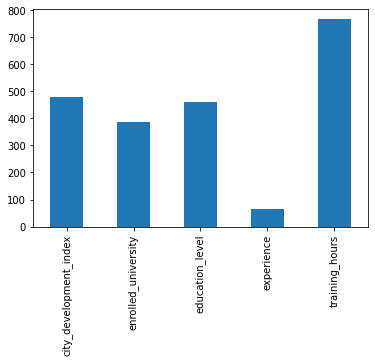

In [33]:
ds_job[cols].isnull().sum().plot(kind = 'bar')

In [34]:
ds_job_dropnull = ds_job[cols].dropna()

In [35]:
ds_job_dropnull

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


<AxesSubplot:>

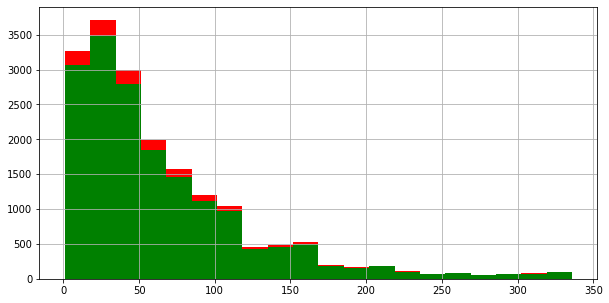

In [36]:
# Checking change in distribution pre and post cca
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10,5))
ds_job['training_hours'].hist(bins = 20, color = 'red', ax = ax1)
ds_job_dropnull['training_hours'].hist(bins = 20, color = 'green', ax = ax1)

# We can see that the distribution remains the same

<AxesSubplot:>

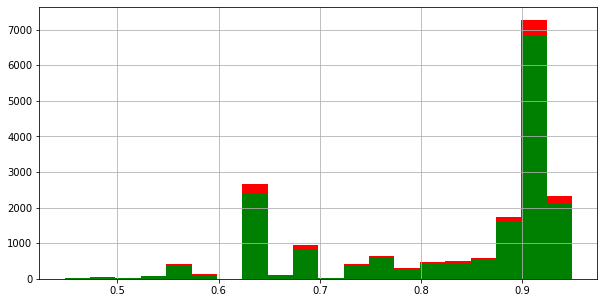

In [37]:
# Checking change in distribution pre and post cca
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10,5))
ds_job['city_development_index'].hist(bins = 20, color = 'red', ax = ax1)
ds_job_dropnull['city_development_index'].hist(bins = 20, color = 'green', ax = ax1)

# We can see that the distribution remains the same

<AxesSubplot:>

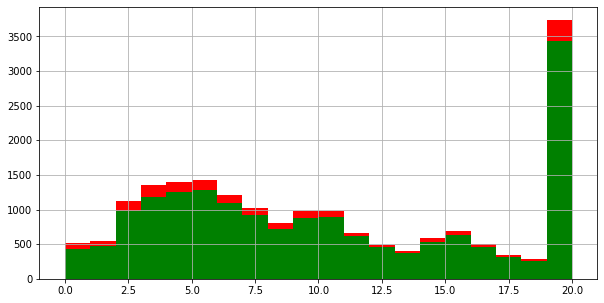

In [38]:
# Checking change in distribution pre and post cca
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10,5))
ds_job['experience'].hist(bins = 20, color = 'red', ax = ax1)
ds_job_dropnull['experience'].hist(bins = 20, color = 'green', ax = ax1)

# We can see that the distribution remains the same apart from some little distractions

For categorical variables, the % of each category in the column should not change much before and after the application of cca

In [53]:
df_comp = pd.concat([ds_job_dropnull['enrolled_university'].value_counts()/len(ds_job['enrolled_university'])*100,ds_job['enrolled_university'].value_counts()/len(ds_job['enrolled_university'])*100], axis =1)

df_comp.columns = ['cca', 'normal']

In [58]:
df_comp = pd.concat([ds_job_dropnull['education_level'].value_counts()/len(ds_job['education_level'])*100,ds_job['education_level'].value_counts()/len(ds_job['education_level'])*100], axis =1)

df_comp.columns = ['cca', 'normal']

In [59]:
df_comp

,cca,normal
Graduate,55.590354,60.538678
Masters,20.993841,22.763336
High School,9.630442,10.528239
Phd,1.983506,2.160977
Primary School,1.487629,1.607683
